In [1]:
import numpy as np
import pandas as pd
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import os
print(os.getcwd())

import os
print(os.path.exists("/Users/tanishagangrade/Downloads/smmh.csv"))

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)  

/Users/tanishagangrade
True


# 1. Loading the data and Cleaning

In [2]:
df = pd.read_csv('/Users/tanishagangrade/Downloads/smmh.csv')
df.head(2).T

,0,1
Timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28
1. What is your age?,21.0,21.0
2. Gender,Male,Female
3. Relationship Status,In a relationship,Single
4. Occupation Status,University Student,University Student
5. What type of organizations are you affiliated with?,University,University
6. Do you use social media?,Yes,Yes
7. What social media platforms do you commonly use?,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord..."
8. What is the average time you spend on social media every day?,Between 2 and 3 hours,More than 5 hours
9. How often do you find yourself using Social media without a specific purpose?,5,4


## 1.1 Renaming the Columns

In [3]:
col_names_dict = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship',
    '4. Occupation Status': 'occupation',
    '5. What type of organizations are you affiliated with?': 'affiliate_organization',
    '6. Do you use social media?': 'social_media_use',
    '7. What social media platforms do you commonly use?': 'platforms',
    '8. What is the average time you spend on social media every day?': 'avg_time_per_day',
    '9. How often do you find yourself using Social media without a specific purpose?': 'without_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless',
    '12. On a scale of 1 to 5, how easily distracted are you?' : 'distracted_ease',
    '13. On a scale of 1 to 5, how much are you bothered by worries?' : 'worries',
    '14. Do you find it difficult to concentrate on things?' : 'concentration',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?' : 'compare_to_others',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?' : 'compare_feelings',
    '17. How often do you look to seek validation from features of social media?' : 'validation',
    '18. How often do you feel depressed or down?' : 'depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?' : 'daily_activity_flux',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?' : 'sleeping_issues'
}


In [4]:
df.rename(columns = col_names_dict, inplace=True)
df.head(2).T

,0,1
timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28
age,21.0,21.0
gender,Male,Female
relationship,In a relationship,Single
occupation,University Student,University Student
affiliate_organization,University,University
social_media_use,Yes,Yes
platforms,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord..."
avg_time_per_day,Between 2 and 3 hours,More than 5 hours
without_purpose,5,4


In [5]:
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'affiliate_organization', 'social_media_use', 'platforms',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues'],
      dtype='object')

## 1.2 Ranges of Values & NaN Values

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.136590,9.915110,13.0,21.0,22.0,26.0,91.0
without_purpose,481.0,3.553015,1.096299,1.0,3.0,4.0,4.0,5.0
distracted,481.0,3.320166,1.328137,1.0,2.0,3.0,4.0,5.0
restless,481.0,2.588358,1.257059,1.0,2.0,2.0,3.0,5.0
distracted_ease,481.0,3.349272,1.175552,1.0,3.0,3.0,4.0,5.0
worries,481.0,3.559252,1.283356,1.0,3.0,4.0,5.0,5.0
concentration,481.0,3.245322,1.347105,1.0,2.0,3.0,4.0,5.0
compare_to_others,481.0,2.831601,1.407835,1.0,2.0,3.0,4.0,5.0
compare_feelings,481.0,2.775468,1.056479,1.0,2.0,3.0,3.0,5.0
validation,481.0,2.455301,1.247739,1.0,1.0,2.0,3.0,5.0


In [7]:
print([f"Nan values in: {(element, value)}" for (element, value) in zip(df.isnull().sum().index, df.isnull().sum()) if value > 0])
# this finds the missing values in the dataframe, along with the number

["Nan values in: ('affiliate_organization', 30)"]


In [8]:
f"Percent NaN = {df["affiliate_organization"].isnull().sum()/len(df["affiliate_organization"])*100:0.2f} %"

'Percent NaN = 6.24 %'

In [9]:
df["affiliate_organization"].fillna(df['affiliate_organization'].value_counts().index[0], inplace=True)

## 1.3 Reducing the values in Column Gender

In [10]:
df["gender"].value_counts()

gender
Female                 263
Male                   211
Nonbinary                1
Non-binary               1
NB                       1
unsure                   1
Trans                    1
Non binary               1
There are others???      1
Name: count, dtype: int64

In [11]:
df["gender"] = df["gender"].apply(lambda a: a if a in ["Male","Female"] else "other")

In [12]:
df["gender"].value_counts()

gender
Female    263
Male      211
other       7
Name: count, dtype: int64

# 2. Social Media and performing EDA

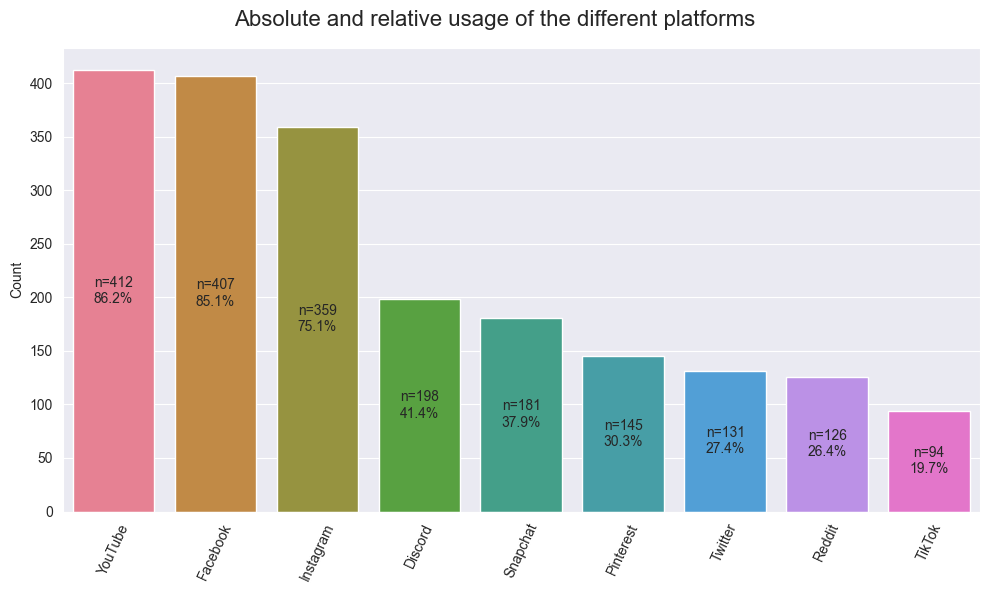

In [13]:
#getting the number of people saying, they are using social media
maxval = df[df["social_media_use"] == 'Yes'].iloc[:,0].count()

#make the plot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = df["platforms"].str.split(', ', expand=True).stack().value_counts().index,
            y = df["platforms"].str.split(', ', expand=True).stack().value_counts(), 
            ax=ax, palette = "husl")
fig.suptitle("Absolute and relative usage of the different platforms", fontsize=16)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=65)

for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x + w / 2., h / 2)
    percent = (h/maxval)*100
    ax.annotate(text=f'n={h:0.0f}\n{percent:0.1f}%', xy=xy, ha='center', va='center')
    
plt.tight_layout();
plt.show()

## 2.2 Platform usage v/s Age

In [14]:
#generating usable data structure
df_platform = pd.concat([df[["age", "gender", "relationship", "occupation",
                             "affiliate_organization", "avg_time_per_day", 
                             "without_purpose", "distracted", "restless", 
                             "distracted_ease", "worries", "concentration",
                             "compare_to_others", "compare_feelings", 
                             "validation", "depressed", "daily_activity_flux",
                             "sleeping_issues"]], 
                             df["platforms"].str.split(', ', expand=True)], axis=1)

platform_list = []
for list in df_platform.iloc[0:,18:].values:
    for entry in list:
        platform_list.append(entry)
platform_set = set(platform_list)
platform_list = [element for element in platform_set if element != None]
df_platform[platform_list] = np.nan

# generating a one hot encoded matrix for Usage
for element in platform_list:
    df_platform.loc[df_platform[(df_platform.loc[0:,0:] == element).any(axis=1)].index, element] = 1

df_platform.drop(labels=[0,1,2,3,4,5,6,7,8], axis=1, inplace=True)
df_platform.head(2).T

,0,1
age,21.0,21.0
gender,Male,Female
relationship,In a relationship,Single
occupation,University Student,University Student
affiliate_organization,University,University
avg_time_per_day,Between 2 and 3 hours,More than 5 hours
without_purpose,5,4
distracted,3,3
restless,2,2
distracted_ease,5,4


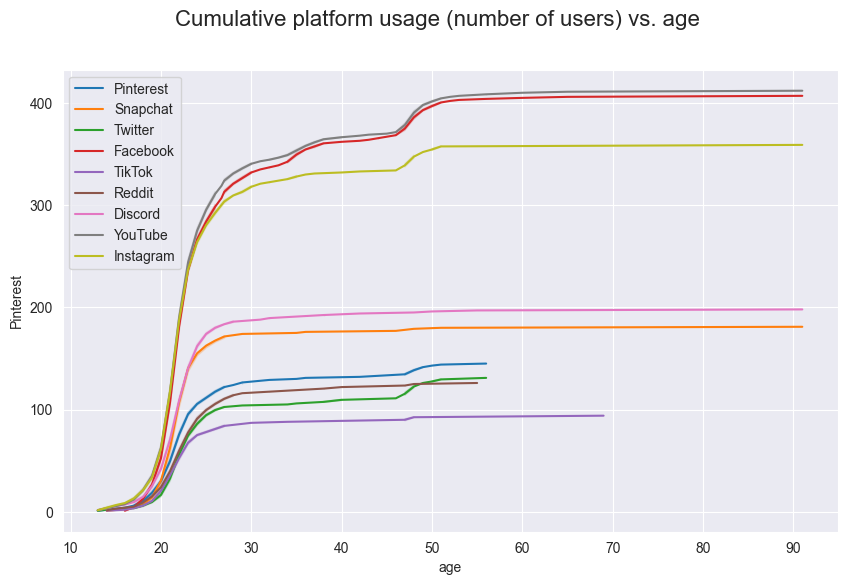

In [15]:
fig, ax = plt.subplots(figsize = (10,6))

for platform in platform_list:
    sns.lineplot(x = df_platform.sort_values(by = ['age'])["age"], y = df_platform.sort_values(by = ['age'])[platform].cumsum(), ax=ax, label=platform)
fig.suptitle("Cumulative platform usage (number of users) vs. age", fontsize=16);

### Splitting the data into age groups

In [16]:
df_20 = df_platform.query("age <= 20")
df_21_30 = df_platform.query("age > 20 & age <=30")
df_31_40 = df_platform.query("age > 30 & age <=40")
df_40 = df_platform.query("age > 40")
print(f"Age below 20: n={len(df_20)}")
print(f"Age 21 to 30: n={len(df_21_30)}")
print(f"Age 31 to 40: n={len(df_31_40)}")
print(f"Age above 40: n={len(df_40)}")

Age below 20: n=96
Age 21 to 30: n=296
Age 31 to 40: n=33
Age above 40: n=56


### Plot for how the platform in different age group vary

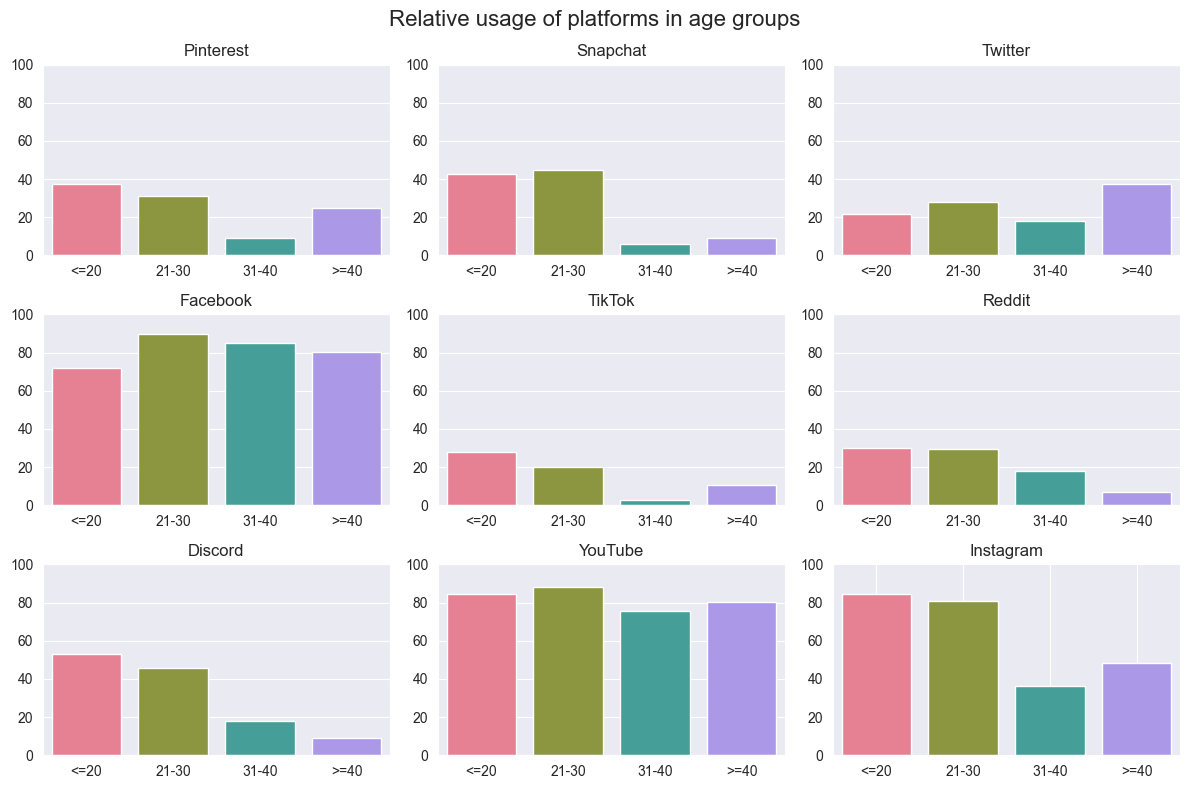

In [17]:
# calculating relative values
fig, axes = plt.subplots(3,3, figsize=(12,8))
axes = axes.flatten()

for (ax, platform) in zip(axes, platform_list):
    x_list = ["<=20","21-30","31-40",">=40"]
    percent20 = df_20[platform].sum()/len(df_20)*100
    percent2130 = df_21_30[platform].sum()/len(df_21_30)*100
    percent3140 = df_31_40[platform].sum()/len(df_31_40)*100
    percent40 = df_40[platform].sum()/len(df_40)*100
    y_list = [percent20, percent2130, percent3140, percent40]
    
    sns.barplot(x=x_list, y=y_list, ax=ax, palette = 'husl')
    ax.set_ylim(0,100)
    ax.set_title(platform)
    
fig.suptitle("Relative usage of platforms in age groups", fontsize=16)
plt.tight_layout()
plt.grid()

### Plot of Time Spent on Social Media

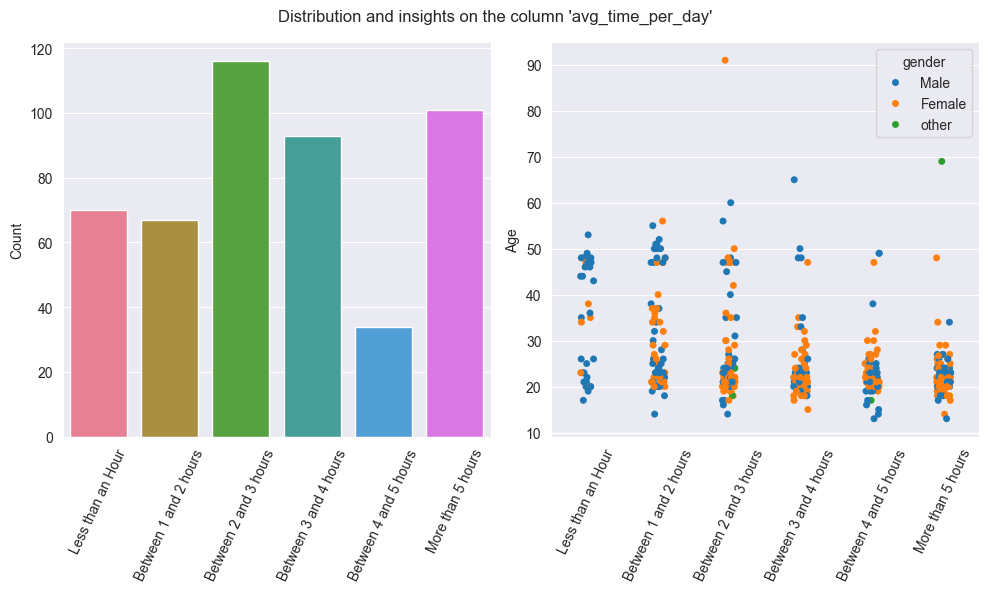

In [18]:
orderlist = ['Less than an Hour', 'Between 1 and 2 hours', 'Between 2 and 3 hours',
         'Between 3 and 4 hours', 'Between 4 and 5 hours', 'More than 5 hours']

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.barplot(x = df.avg_time_per_day.unique(), y = df.avg_time_per_day.value_counts(), ax = ax[0], order = orderlist, palette = "husl")
ax[1] = sns.stripplot(data = df, x = df.avg_time_per_day, y = df.age, hue = "gender", order = orderlist)
fig.suptitle("Distribution and insights on the column 'avg_time_per_day'")
ax[0].set_xlabel("")
ax[0].set_ylabel("Count")
ax[1].set_xlabel("")
ax[1].set_ylabel("Age")
ax[0].tick_params(axis='x', rotation=65)
ax[1].tick_params(axis='x', rotation=65)
plt.tight_layout();

# 3. Mental Health Impact - using EDA

In [19]:
df_platform["platform_sum"] = 0
for platform in platform_list:
    df_platform["platform_sum"] = df_platform["platform_sum"] + df_platform[platform].fillna(0).astype(int)

df_platform["impact_sum"] = 0
df_platform["impact_sum"] = df_platform["without_purpose"] + df_platform["distracted"] + df_platform["restless"] + df_platform["distracted_ease"] + df_platform["worries"] + df_platform["concentration"] + df_platform["compare_to_others"] + df_platform["compare_feelings"] + df_platform["validation"] + df_platform["depressed"] + df_platform["daily_activity_flux"] + df_platform["sleeping_issues"]





In [20]:
df_platform.head()

,age,gender,relationship,occupation,affiliate_organization,avg_time_per_day,without_purpose,distracted,restless,distracted_ease,worries,concentration,compare_to_others,compare_feelings,validation,depressed,daily_activity_flux,sleeping_issues,Pinterest,Snapchat,Twitter,Facebook,TikTok,Reddit,Discord,YouTube,Instagram,platform_sum,impact_sum
0,21.0,Male,In a relationship,University Student,University,Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,6,43
1,21.0,Female,Single,University Student,University,More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,6,43
2,21.0,Female,Single,University Student,University,Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,4,35
3,21.0,Female,Single,University Student,University,More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2,35
4,21.0,Female,Single,University Student,University,Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,3,44


## 3.1 Generating new Features

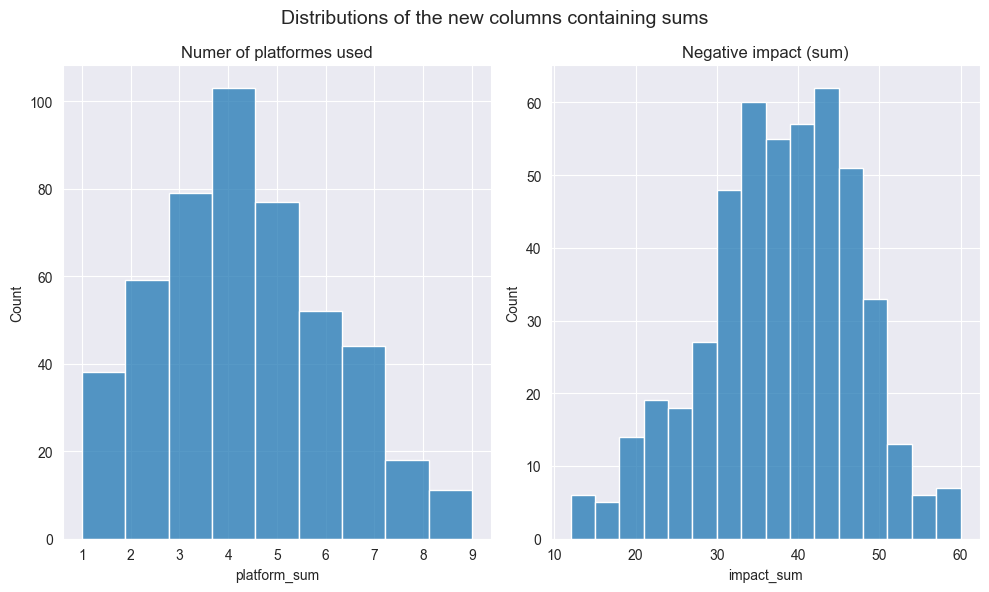

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(data = df_platform, x="platform_sum", ax=ax[0], bins=9)
sns.histplot(data = df_platform, x="impact_sum", ax=ax[1])
fig.suptitle("Distributions of the new columns containing sums", fontsize=14)
ax[0].set_title("Numer of platformes used")
ax[1].set_title("Negative impact (sum)")
plt.tight_layout();

## 3.2 Platforms using v/s Mental Health

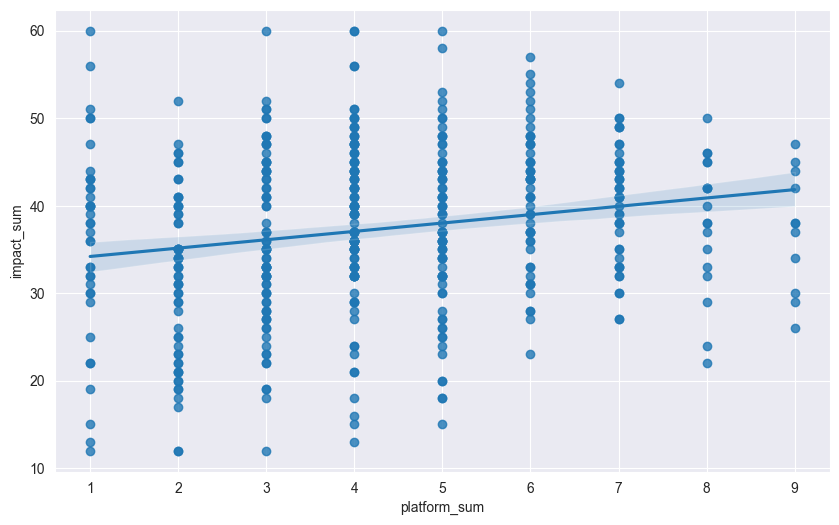

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_platform.platform_sum, y=df_platform.impact_sum, ax=ax);

## 3.3 Age v/s Negative Impact

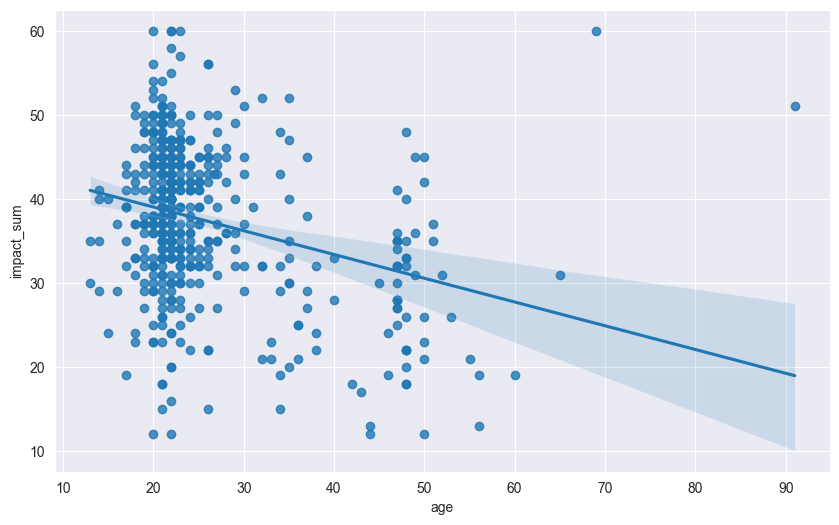

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x=df_platform.age, y=df_platform.impact_sum, ax=ax);

## 3.4 Average time on social media v/s Mental Health 

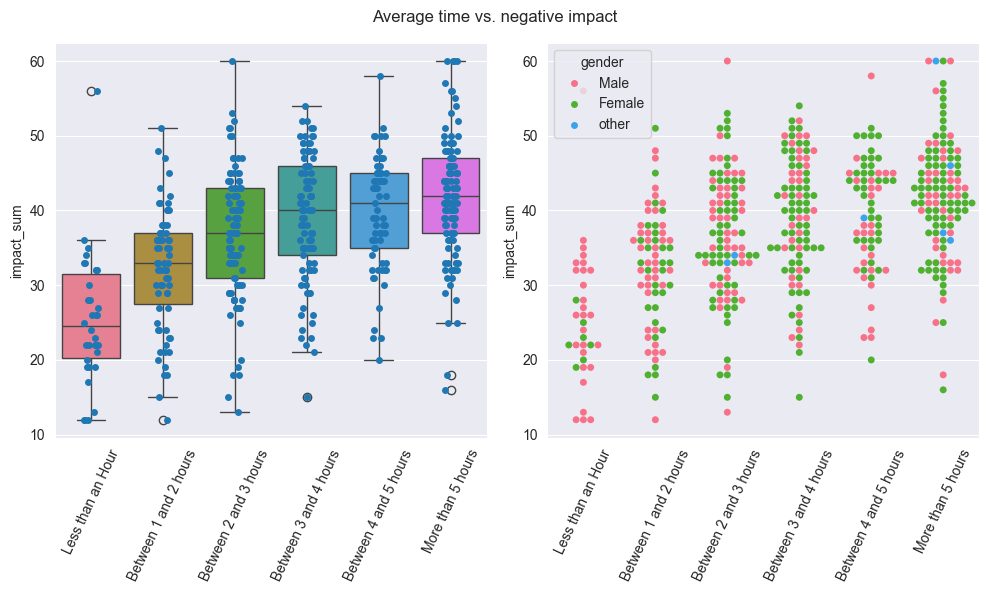

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.stripplot(x = df_platform.avg_time_per_day, y = df_platform.impact_sum, ax = ax[0], order = orderlist)
sns.boxplot(x = df_platform.avg_time_per_day,  y = df_platform.impact_sum, ax = ax[0], order = orderlist, palette = 'husl')
sns.swarmplot(x = df_platform.avg_time_per_day,  y = df_platform.impact_sum, ax = ax[1], order = orderlist, hue = df_platform.gender, palette = 'husl')
ax[0].tick_params(axis='x', rotation=65)
ax[0].set_xlabel("")
ax[1].tick_params(axis='x', rotation=65)
ax[1].set_xlabel("")
fig.suptitle("Average time vs. negative impact")
plt.tight_layout();

# 4. Predicting the risk for Mental Health

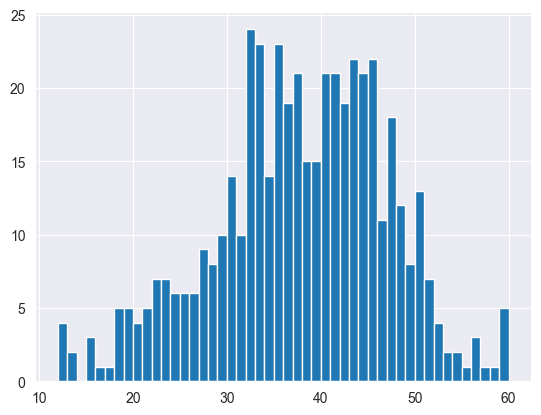

In [25]:
df_platform.impact_sum.hist(bins = 48);

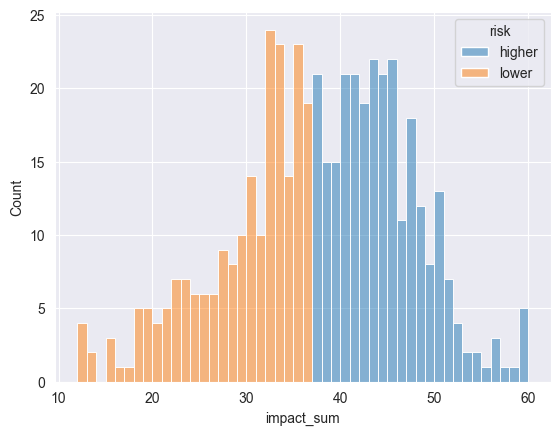

In [26]:
df_platform["risk"] = "lower"
df_platform.loc[df_platform[df_platform.impact_sum >= 37].index, "risk"] = "higher"
df_platform.risk = df_platform.risk.astype("category")
sns.histplot(x = df_platform.impact_sum, bins=48, hue = df_platform.risk);

#### The model is predicting the higher and lower risks only.

In [27]:
df.columns

Index(['timestamp', 'age', 'gender', 'relationship', 'occupation',
       'affiliate_organization', 'social_media_use', 'platforms',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues'],
      dtype='object')

In [28]:
df_platform.columns

Index(['age', 'gender', 'relationship', 'occupation', 'affiliate_organization',
       'avg_time_per_day', 'without_purpose', 'distracted', 'restless',
       'distracted_ease', 'worries', 'concentration', 'compare_to_others',
       'compare_feelings', 'validation', 'depressed', 'daily_activity_flux',
       'sleeping_issues', 'Pinterest', 'Snapchat', 'Twitter', 'Facebook',
       'TikTok', 'Reddit', 'Discord', 'YouTube', 'Instagram', 'platform_sum',
       'impact_sum', 'risk'],
      dtype='object')

In [29]:
df_platform['depressed'].T

0      5
1      5
2      4
3      4
4      4
      ..
476    3
477    4
478    2
479    4
480    2
Name: depressed, Length: 481, dtype: int64

In [30]:
df_platform = df_platform.replace(np.nan, 0)

label = "depressed"
features = ["age", "gender", "relationship", "avg_time_per_day", "Pinterest", "YouTube", "Reddit", "TikTok", "Instagram", "Facebook", "Snapchat", "Discord", "risk"]
target = df_platform[label]
data = df_platform[features]
data.shape, target.shape



((481, 13), (481,))

## Encoding the Categorical Data

In [31]:
my_label_enc = LabelEncoder()
one_hot_enc = OneHotEncoder()

In [32]:
enc_list = ["gender", "relationship", "avg_time_per_day", "risk"]
target = my_label_enc.fit_transform(target)
df_encoded = pd.get_dummies(data[enc_list]).astype(int)
data = pd.concat([data.drop(columns=enc_list), df_encoded], axis=1)

In [33]:
data

,age,Pinterest,YouTube,Reddit,TikTok,Instagram,Facebook,Snapchat,Discord,gender_Female,gender_Male,gender_other,relationship_Divorced,relationship_In a relationship,relationship_Married,relationship_Single,avg_time_per_day_Between 1 and 2 hours,avg_time_per_day_Between 2 and 3 hours,avg_time_per_day_Between 3 and 4 hours,avg_time_per_day_Between 4 and 5 hours,avg_time_per_day_Less than an Hour,avg_time_per_day_More than 5 hours,risk_higher,risk_lower
0,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,21.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,21.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
477,26.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1
478,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
479,21.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [34]:
data_copy = pd.concat([data, pd.DataFrame(target, columns=['depressed'])], axis=1) 

In [35]:
correlation_matrix = data_copy.corr()

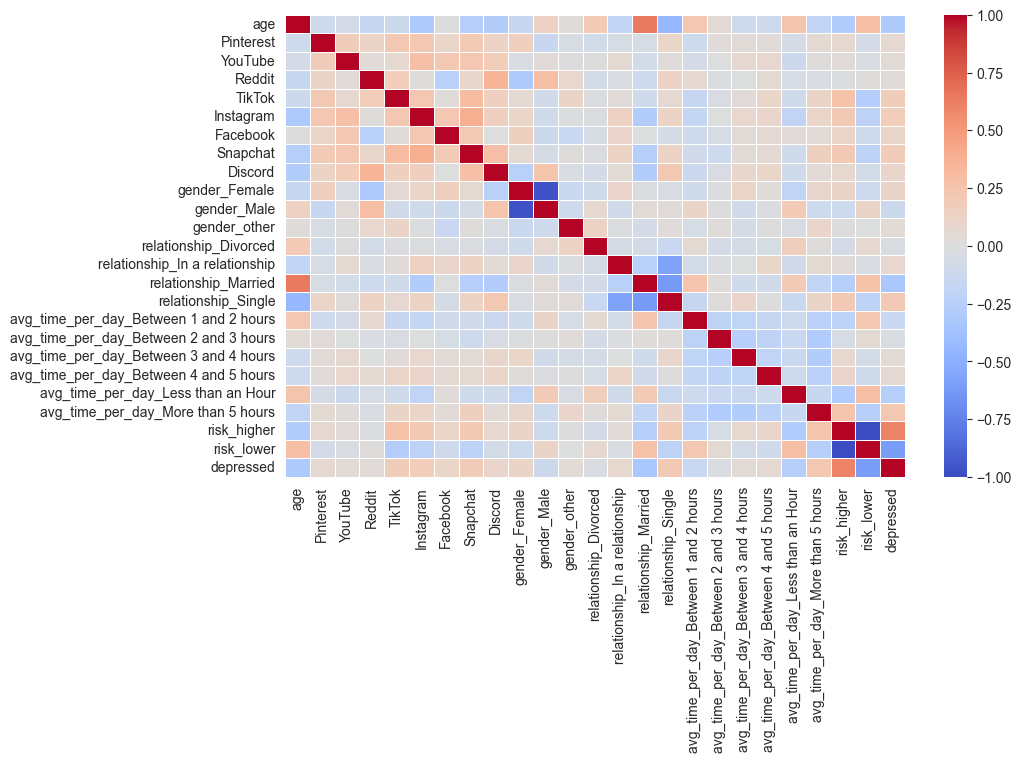

In [36]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

plt.show()

# 5. Principle Component Analysis

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

In [38]:
# Initializing PCA and specifying the number of components
pca = PCA(n_components=6)  # Reduced the data to 2 principal components

# Fitting PCA on the scaled data and transforming the data
X_pca = pca.fit_transform(X_scaled)

# The transformed dataset is now in a 2D space
print("Transformed Data (first 5 rows):")
print(X_pca[:5])

Transformed Data (first 5 rows):
[[-0.56193765 -1.60692603 -1.07344761 -1.13330192  1.93453122 -1.61848119]
 [-1.96361838 -0.14793653  1.07473232 -0.17998661  0.11974971  0.59432565]
 [-0.21238419  1.24725467 -0.16947915  2.93050049 -0.71548175  0.36943318]
 [ 0.27527605  1.38470472  1.73803438  0.93237259  0.80851049  1.83414848]
 [-0.94286143  1.33271668  1.40271546  0.57750118 -0.18989298 -0.79531341]]


In [39]:
# Explained variance ratio
print("Explained variance ratio for each component:")
print(pca.explained_variance_ratio_)

# Cumulative explained variance
print("Cumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_)) 

Explained variance ratio for each component:
[0.1625143  0.10362688 0.07392818 0.06639028 0.05785542 0.05606487]
Cumulative explained variance:
[0.1625143  0.26614118 0.34006936 0.40645964 0.46431506 0.52037993]


## Setting up the Model

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=43, stratify=target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 24), (97, 24), (384,), (97,))

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
y_test = y_train
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
X_test = X_train
from sklearn.metrics import accuracy_score, classification_report 

In [42]:
# Initialize individual classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
nb_clf = MultinomialNB()

# Create the ensemble classifier with a soft voting mechanism
ensemble_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('xgboost', xgb_clf),
        ('naive_bayes', nb_clf)
    ],
    voting='soft'  # 'soft' voting for probability-based averaging
) 

In [43]:
import sklearn
import xgboost

print("Scikit-Learn Version:", sklearn.__version__)  # Should be 1.3.x or lower
print("XGBoost Version:", xgboost.__version__) 

Scikit-Learn Version: 1.6.1
XGBoost Version: 1.6.2


In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Example of combining classifiers in a VotingClassifier
clf1 = SVC(probability=True)
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()

ensemble_clf = VotingClassifier(estimators=[
    ('svc', clf1),
    ('dt', clf2),
    ('lr', clf3)
], voting='soft')  # or 'hard'

In [45]:
print(X_train.shape)  # Should print (num_samples, num_features)
print(y_train.shape)  

(384, 24)
(384,)


In [46]:
y_train = y_train.ravel()

In [47]:
import numpy as np
print(np.any(np.isnan(X_train)))  # Check if X_train has NaN values
print(np.any(np.isnan(y_train)))

False
False


In [48]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

LogisticRegression()

In [49]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Instantiate classifiers correctly
clf1 = SVC(probability=True)
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()

# Then use them in your ensemble
ensemble_clf = VotingClassifier(estimators=[
    ('svc', clf1),
    ('dt', clf2),
    ('lr', clf3)
], voting='soft')  

In [50]:
X_train = np.array(X_train)  # Ensure X_train is 2D
print(X_train.shape)

(384, 24)


In [51]:
y_train = np.ravel(y_train)  # Ensure y_train is 1D
print(y_train.shape)

(384,)


In [52]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)

In [53]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ensemble_clf, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.32467532 0.24675325 0.32467532 0.33766234 0.30263158]


In [55]:
from sklearn.metrics import accuracy_score
y_pred = ensemble_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9870


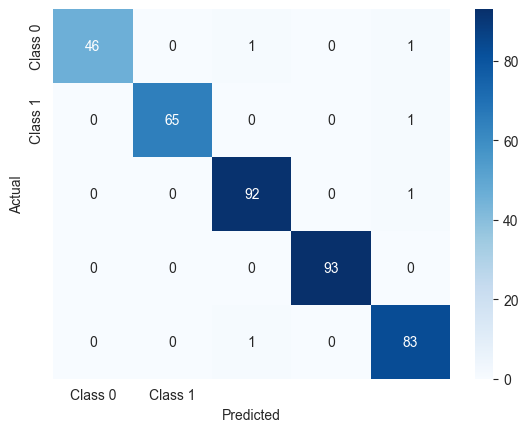

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       1.00      0.98      0.99        66
           2       0.98      0.99      0.98        93
           3       1.00      1.00      1.00        93
           4       0.97      0.99      0.98        84

    accuracy                           0.99       384
   macro avg       0.99      0.98      0.99       384
weighted avg       0.99      0.99      0.99       384



In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 1, 10],
    'dt__max_depth': [3, 5, 7],
    'lr__C': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(ensemble_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'dt__max_depth': 3, 'lr__C': 1, 'svc__C': 1}
Best score:  0.3648667122351333


In [59]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ensemble_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

Cross-validation scores: [0.2987013  0.22077922 0.35064935 0.35064935 0.31578947]
Mean accuracy: 0.3073


In [60]:
import joblib
joblib.dump(ensemble_clf, 'ensemble_model.pkl')

['ensemble_model.pkl']

In [61]:
loaded_model = joblib.load('ensemble_model.pkl')

# Deploying the Model using Flask API

In [77]:
import joblib
joblib.dump(ensemble_clf, 'ensemble_model.pkl')


['ensemble_model.pkl']

In [78]:
pip install flask-ngrok


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
import joblib
joblib.dump(ensemble_clf, 'ensemble_model.pkl')


['ensemble_model.pkl']

In [80]:
import os
if not os.path.exists('ensemble_model.pkl'):
    raise FileNotFoundError("Model file 'ensemble_model.pkl' not found!")

In [81]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Example: Train a simple model (change it according to your use case)
X_train = [[1, 2], [3, 4], [5, 6]]
y_train = [0, 1, 0]

model = RandomForestClassifier()
model.fit(X_train, y_train)  # Train the model

# Now save the model
with open("ensemble_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")

Model saved successfully!


In [82]:
with open("ensemble_model.pkl", "rb") as f:
    model = pickle.load(f)
print("Model loaded successfully!")

Model loaded successfully!


In [83]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
import threading

# Load the trained model
with open("ensemble_model.pkl", "rb") as f:
    model = pickle.load(f)

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "Flask API is running!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    if "feature" not in data:
        return jsonify({"error": "Missing 'feature' in request"}), 400

    X_input = np.array(data["feature"]).reshape(-1, 1)
    prediction = model.predict(X_input)
    return jsonify({"prediction": prediction.tolist()})

# Run Flask in a separate thread
def run_flask():
    app.run(debug=False, port=5004, use_reloader=False)

flask_thread = threading.Thread(target=run_flask)
flask_thread.start() 

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5004
Press CTRL+C to quit
127.0.0.1 - - [07/Feb/2025 22:54:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2025 22:54:54] "GET /favicon.ico HTTP/1.1" 404 -


import requests

# API endpoint
url = "http://127.0.0.1:5003/predict"

# Test data (make sure it matches the input expected by your model)
data = {"feature": [[6, 2, 3, 4]]}  # Modify as per your model's expected input format

# Send POST request
response = requests.post(url, json=data)

# Print the response
print("Response Status Code:", response.status_code)
print("Response JSON:", response.json())

def home():
    return "Flask API is running!"

import requests

url = "http://127.0.0.1:5003/predict"  # Correct API route
data = {"feature": [6]}  # Adjust this based on your model's input format

response = requests.post(url, json=data)
print(response.json()) 

response = requests.get("http://127.0.0.1:5001/predict")